### Student Information
Name:黃浩瑋

Student ID:109020023

GitHub ID:wayne53076

Kaggle name:wayne1234

Kaggle private scoreboard snapshot:

[Snapshot](img/pic0.png)


---

### Instructions

1. First: __This part is worth 30% of your grade.__ Do the **take home** exercises in the DM2023-Lab2-master. You may need to copy some cells from the Lab notebook to this notebook.


2. Second: __This part is worth 30% of your grade.__ Participate in the in-class [Kaggle Competition](https://www.kaggle.com/t/09b1d0f3f8584d06848252277cb535f2) regarding Emotion Recognition on Twitter by this link https://www.kaggle.com/t/09b1d0f3f8584d06848252277cb535f2. The scoring will be given according to your place in the Private Leaderboard ranking:
    - **Bottom 40%**: Get 20% of the 30% available for this section.

    - **Top 41% - 100%**: Get (60-x)/6 + 20 points, where x is your ranking in the leaderboard (ie. If you rank 3rd your score will be (60-3)/6 + 20 = 29.5% out of 30%)   
    Submit your last submission __BEFORE the deadline (Dec. 27th 11:59 pm, Wednesday)_. Make sure to take a screenshot of your position at the end of the competition and store it as '''pic0.png''' under the **img** folder of this repository and rerun the cell **Student Information**.
    

3. Third: __This part is worth 30% of your grade.__ A report of your work developping the model for the competition (You can use code and comment it). This report should include what your preprocessing steps, the feature engineering steps and an explanation of your model. You can also mention different things you tried and insights you gained.


4. Fourth: __This part is worth 10% of your grade.__ It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**.


Upload your files to your repository then submit the link to it on the corresponding e-learn assignment.

Make sure to commit and save your changes to your repository __BEFORE the deadline (Dec. 31th 11:59 pm, Sunday)__.

# First

In [ ]:
import pandas as pd

### training data
anger_train = pd.read_csv("data/semeval/train/anger-ratings-0to1.train.txt",
                         sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
sadness_train = pd.read_csv("data/semeval/train/sadness-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_train = pd.read_csv("data/semeval/train/fear-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_train = pd.read_csv("data/semeval/train/joy-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

In [ ]:
# combine 4 sub-dataset
train_df = pd.concat([anger_train, fear_train, joy_train, sadness_train], ignore_index=True)

In [ ]:
### testing data
anger_test = pd.read_csv("data/semeval/dev/anger-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
sadness_test = pd.read_csv("data/semeval/dev/sadness-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_test = pd.read_csv("data/semeval/dev/fear-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_test = pd.read_csv("data/semeval/dev/joy-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# combine 4 sub-dataset
test_df = pd.concat([anger_test, fear_test, joy_test, sadness_test], ignore_index=True)
train_df.head()

,id,text,emotion,intensity
0,10000,How the fu*k! Who the heck! moved my fridge!.....,anger,0.938
1,10001,So my Indian Uber driver just called someone t...,anger,0.896
2,10002,@DPD_UK I asked for my parcel to be delivered ...,anger,0.896
3,10003,so ef whichever butt wipe pulled the fire alar...,anger,0.896
4,10004,Don't join @BTCare they put the phone down on ...,anger,0.896


In [ ]:
# shuffle dataset
train_df = train_df.sample(frac=1)
test_df = test_df.sample(frac=1)

---
### ** >>> Exercise 1 (Take home): **  
Plot word frequency for Top 30 words in both train and test dataset. (Hint: refer to DM lab 1)


In [ ]:
#training data
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
import plotly.express as px
count_vect = CountVectorizer()
train_counts = count_vect.fit_transform(train_df['text'])
train_term_frequencies = np.asarray(train_counts.sum(axis=0))[0]

temp = [(v,i) for i,v in enumerate(train_term_frequencies)]
temp.sort()
temp.reverse()
show_list = [i[1] for i in temp[:30]]
fig = px.bar(data_frame=[train_term_frequencies[i] for i in show_list],
             x=[count_vect.get_feature_names_out()[i]for i in show_list],
             y=[train_term_frequencies[i] for i in show_list])
fig.show()

In [ ]:
#testing data

import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
import plotly.express as px
count_vect = CountVectorizer()
test_counts = count_vect.fit_transform(test_df['text'])
test_term_frequencies = np.asarray(test_counts.sum(axis=0))[0]

temp = [(v,i) for i,v in enumerate(test_term_frequencies)]
temp.sort()
temp.reverse()
show_list = [i[1] for i in temp[:30]]
fig = px.bar(data_frame=[test_term_frequencies[i] for i in show_list],
             x=[count_vect.get_feature_names_out()[i]for i in show_list],
             y=[test_term_frequencies[i] for i in show_list])
fig.show()

In [ ]:
## save to pickle file
train_df.to_pickle("train_df.pkl")
test_df.to_pickle("test_df.pkl")

---
### ** >>> Exercise 2 (Take home): **  
Generate an embedding using the TF-IDF vectorizer instead of th BOW one with 1000 features and show the feature names for features [100:110].

In [ ]:
# Answer here
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
Tfidf_1000 = TfidfVectorizer(max_features=1000, tokenizer=nltk.word_tokenize)
Tfidf_1000.fit(train_df['text'])
train_data_Tfidf_1000 = Tfidf_1000.transform(train_df['text'])
print(train_data_Tfidf_1000.shape)
print(Tfidf_1000.get_feature_names_out()[100:110])

c:\Python39\lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning:

The parameter 'token_pattern' will not be used since 'tokenizer' is not None'



(3613, 1000)
['awful' 'b' 'baby' 'back' 'bad' 'ball' 'balls' 'bb18' 'bc' 'bday']


In [ ]:
"😂" in Tfidf_1000.get_feature_names_out()

True

In [ ]:
import nltk

# build analyzers (bag-of-words)
BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize)

# apply analyzer to training data
BOW_500.fit(train_df['text'])

train_data_BOW_features_500 = BOW_500.transform(train_df['text'])

## check dimension
train_data_BOW_features_500.shape

(3613, 500)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# for a classificaiton problem, you need to provide both training & testing data
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## take a look at data dimension is a good habit  :)
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


In [ ]:
## build DecisionTree model
DT_model = DecisionTreeClassifier(random_state=1)

## training!
DT_model = DT_model.fit(X_train, y_train)

## predict!
y_train_pred = DT_model.predict(X_train)
y_test_pred = DT_model.predict(X_test)

## so we get the pred result
y_test_pred[:10]

array(['fear', 'joy', 'fear', 'joy', 'fear', 'anger', 'fear', 'anger',
       'joy', 'sadness'], dtype=object)

In [ ]:
## accuracy
from sklearn.metrics import accuracy_score

acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))


training accuracy: 0.99
testing accuracy: 0.68


In [ ]:
## precision, recall, f1-score,
from sklearn.metrics import classification_report

print(classification_report(y_true=y_test, y_pred=y_test_pred))

              precision    recall  f1-score   support

       anger       0.66      0.68      0.67        84
        fear       0.66      0.69      0.67       110
         joy       0.72      0.71      0.71        79
     sadness       0.70      0.64      0.67        74

    accuracy                           0.68       347
   macro avg       0.68      0.68      0.68       347
weighted avg       0.68      0.68      0.68       347



In [ ]:
## check by confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred)
print(cm)

[[57 18  6  3]
 [16 76  9  9]
 [ 6  9 56  8]
 [ 7 13  7 47]]


In [ ]:
# Funciton for visualizing confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix',
                          cmap=sns.cubehelix_palette(as_cmap=True)):
    """
    This function is modified from:
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    classes.sort()
    tick_marks = np.arange(len(classes))

    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels = classes,
           yticklabels = classes,
           title = title,
           xlabel = 'Predicted label',
           ylabel = 'True label')

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -.5])
    plt.tight_layout()
    plt.show()

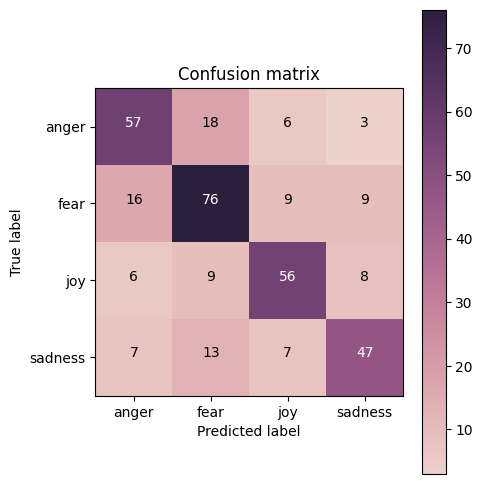

In [ ]:
# plot your confusion matrix
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')

---
### ** >>> Exercise 3 (Take home): **  
Can you interpret the results above? What do they mean?

ans: 在對角線上的數字代表預測正確的值，對角線上的數字越大代表模型預測的越好，剩下的格子代表預測錯誤的值，數字越小代表模型預測的越好，但因為這4種情緒的分布不平均，所以無法直接看出這個模型預測哪種情緒比較準

---
### ** >>> Exercise 4 (Take home): **  
Build a model using a ```Naive Bayes``` model and train it. What are the testing results?

*Reference*: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

In [ ]:
# Answer here
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train, y_train)

nb_y_train_pred = nb.predict(X_train)
nb_y_test_pred = nb.predict(X_test)


In [ ]:
#evaluation
acc_train = accuracy_score(y_true=y_train, y_pred=nb_y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=nb_y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))


training accuracy: 0.79
testing accuracy: 0.7


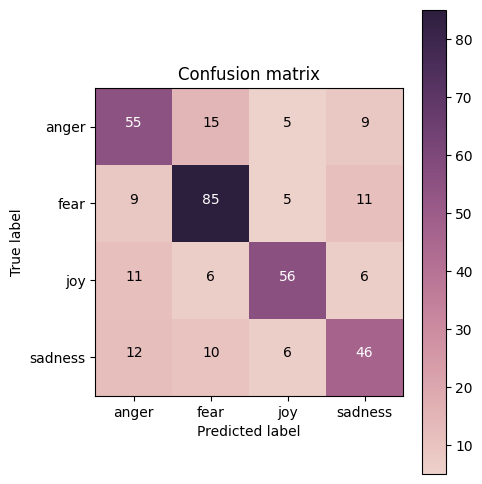

In [ ]:
my_tags = ['anger', 'fear', 'joy', 'sadness']
nbcm = confusion_matrix(y_true=y_test, y_pred=nb_y_test_pred)
plot_confusion_matrix(nbcm, classes=my_tags, title='Confusion matrix')

---
### ** >>> Exercise 5 (Take home): **  

How do the results from the Naive Bayes model and the Decision Tree model compare? How do you interpret these differences? Use the theoretical background covered in class to try and explain these differences.

Decision Tree的分類方式是找出一種分割方式使entropy最小，因為使用training data作為分割依據，所以training的accuracy可以到0.99，但也因為overfitting，所以testing的accuracy比較低

Naive Bayes使用機率預測，所以training的accuracy沒有那麼高，所以也沒有那麼overfitting，testing的accuracy比較高

In [ ]:
import keras

# standardize name (X, y)
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## check dimension is a good habbit
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


In [ ]:
## deal with label (string -> one-hot)

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(y_train)
print('check label: ', label_encoder.classes_)
print('\n## Before convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)

def label_encode(le, labels):
    enc = le.transform(labels)
    return keras.utils.to_categorical(enc)

def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1)
    return le.inverse_transform(dec)

y_train = label_encode(label_encoder, y_train)
y_test = label_encode(label_encoder, y_test)

print('\n\n## After convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)


check label:  ['anger' 'fear' 'joy' 'sadness']

## Before convert
y_train[0:4]:
 1115     fear
1360     fear
21      anger
920      fear
Name: emotion, dtype: object

y_train.shape:  (3613,)
y_test.shape:  (347,)


## After convert
y_train[0:4]:
 [[0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]]

y_train.shape:  (3613, 4)
y_test.shape:  (347, 4)


In [ ]:
# I/O check
input_shape = X_train.shape[1]
print('input_shape: ', input_shape)

output_shape = len(label_encoder.classes_)
print('output_shape: ', output_shape)

input_shape:  500
output_shape:  4


In [ ]:
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers import ReLU, Softmax

# input layer
model_input = Input(shape=(input_shape, ))  # 500
X = model_input

# 1st hidden layer
X_W1 = Dense(units=64)(X)  # 64
H1 = ReLU()(X_W1)

# 2nd hidden layer
H1_W2 = Dense(units=64)(H1)  # 64
H2 = ReLU()(H1_W2)

# output layer
H2_W3 = Dense(units=output_shape)(H2)  # 4
H3 = Softmax()(H2_W3)

model_output = H3

# create model
model = Model(inputs=[model_input], outputs=[model_output])

# loss function & optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# show model construction
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 500)]             0         
                                                                 
 dense (Dense)               (None, 64)                32064     
                                                                 
 re_lu (ReLU)                (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 re_lu_1 (ReLU)              (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 4)                 260       
                                                                 
 softmax (Softmax)           (None, 4)                 0     

In [ ]:
from keras.callbacks import CSVLogger

csv_logger = CSVLogger('logs/training_log.csv')

# training setting
epochs = 25
batch_size = 32 #113*32 = data size

# training!
history = model.fit(X_train, y_train,
                    epochs=epochs,
                    batch_size=batch_size,
                    callbacks=[csv_logger],
                    validation_data = (X_test, y_test))
print('training finish')

Epoch 1/25
  1/113 [..............................] - ETA: 1s - loss: 1.1271 - accuracy: 0.5312

113/113 [==============================] - 0s 3ms/step - loss: 1.0007 - accuracy: 0.6399 - val_loss: 0.9145 - val_accuracy: 0.6859
Epoch 2/25
113/113 [==============================] - 0s 3ms/step - loss: 0.5876 - accuracy: 0.7971 - val_loss: 0.7820 - val_accuracy: 0.7176
Epoch 3/25
113/113 [==============================] - 0s 3ms/step - loss: 0.4202 - accuracy: 0.8445 - val_loss: 0.8015 - val_accuracy: 0.6859
Epoch 4/25
113/113 [==============================] - 0s 3ms/step - loss: 0.3329 - accuracy: 0.8790 - val_loss: 0.8157 - val_accuracy: 0.7089
Epoch 5/25
113/113 [==============================] - 0s 3ms/step - loss: 0.2692 - accuracy: 0.9095 - val_loss: 0.8581 - val_accuracy: 0.7003
Epoch 6/25
113/113 [==============================] - 0s 3ms/step - loss: 0.2221 - accuracy: 0.9233 - val_loss: 0.9228 - val_accuracy: 0.6916
Epoch 7/25
113/113 [==============================] - 0s 3ms/step - loss: 0.1859 - accuracy: 0.9394 - val_loss: 0.9455 - val_accuracy: 0.6888
Epoch 8/25
113/11

In [ ]:
#Let's take a look at the training log
training_log = pd.DataFrame()
training_log = pd.read_csv("logs/training_log.csv")
training_log

,epoch,accuracy,loss,val_accuracy,val_loss
0,0,0.639911,1.000722,0.685879,0.914482
1,1,0.797122,0.587562,0.717579,0.782006
2,2,0.844451,0.420243,0.685879,0.801499
3,3,0.879048,0.332867,0.708934,0.815691
4,4,0.909494,0.269189,0.700288,0.858118
5,5,0.923332,0.222145,0.691643,0.922777
6,6,0.939386,0.185924,0.688761,0.945450
7,7,0.951841,0.157326,0.691643,1.055765
8,8,0.960697,0.139692,0.694524,1.056161
9,9,0.965956,0.122247,0.703170,1.104935


---
### ** >>> Exercise 6 (Take home): **  

Plot the Training and Validation Accuracy and Loss (different plots), just like the images below.(Note: the pictures below are an example from a different model). How to interpret the graphs you got? How are they related to the concept of overfitting/underfitting covered in class?
<table><tr>
    <td><img src="pics/pic3.png" style="width: 300px;"/> </td>
    <td><img src="pics/pic4.png" style="width: 300px;"/> </td>
</tr></table>

In [ ]:
import plotly.graph_objects as go

x_data = list(range(25))
trace1 = go.Scatter(x=x_data, y=training_log['accuracy'], mode='lines', name = "accuracy")
trace2 = go.Scatter(x=x_data, y=training_log['val_accuracy'], mode='lines', name = "val_accuracy")
fig = go.Figure(data=[trace1, trace2])
fig.show()

當training的Accuracy逐漸上升的時候，validation的Accuracy可能會逐漸下降，因為model可能overfitting training data，導致預測一般情況的能力下降

In [ ]:
x_data = list(range(25))
trace1 = go.Scatter(x=x_data, y=training_log['loss'], mode='lines', name = "loss")
trace2 = go.Scatter(x=x_data, y=training_log['val_loss'], mode='lines', name = "val_loss")
fig = go.Figure(data=[trace1, trace2])
fig.show()

當training的loss逐漸下降的時候，validation的loss可能會逐漸上升，因為model可能overfitting training data，導致預測一般情況的能力下降，所以誤差上升

In [ ]:
from gensim.models import KeyedVectors

## Note: this model is very huge, this will take some time ...
model_path = "GoogleNews/GoogleNews-vectors-negative300.bin.gz"
w2v_google_model = KeyedVectors.load_word2vec_format(model_path, binary=True)
print('load ok')

w2v_google_model.most_similar('happy', topn=10)

load ok


[('glad', 0.7408890724182129),
 ('pleased', 0.6632170677185059),
 ('ecstatic', 0.6626912355422974),
 ('overjoyed', 0.6599286794662476),
 ('thrilled', 0.6514049172401428),
 ('satisfied', 0.6437949538230896),
 ('proud', 0.636042058467865),
 ('delighted', 0.627237856388092),
 ('disappointed', 0.6269949674606323),
 ('excited', 0.6247665286064148)]

---
### ** >>> Exercise 7 (Take home): **  

Now, we have the word vectors, but our input data is a sequence of words (or say sentence).
How can we utilize these "word" vectors to represent the sentence data and train our model?


In [ ]:
# Answer here
## check library
import gensim

## ignore warnings
import warnings
warnings.filterwarnings('ignore')

# # if you want to see the training messages, you can use it
# import logging
# logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

## the input type
train_df['text_tokenized'] = train_df['text'].apply(lambda x: nltk.word_tokenize(x))
train_df[['id', 'text', 'text_tokenized']].head()
print(type(w2v_google_model.get_vector('happy')))
sentense_vector_train = []
for i in range(len(train_df['text_tokenized'])):
    v = np.zeros(300)
    for w in train_df['text_tokenized'][i]:
        if w2v_google_model.has_index_for(w):
            v += w2v_google_model.get_vector(w)
    v /= len(train_df['text_tokenized'][i])
    sentense_vector_train.append(v)
sentense_vector_train = np.array(sentense_vector_train)
print(sentense_vector_train.shape)

<class 'numpy.ndarray'>
(3613, 300)


In [ ]:
sim = w2v_google_model.cosine_similarities(sentense_vector_train[0],sentense_vector_train)
sim = [(v,i) for i,v in enumerate(sim)]
sim.sort(reverse= True)

print("original text:", train_df['text'][0])
print("top 10 similar sentense:")
for i in range(1,11):
    print(i,train_df['text'][sim[i][1]])

original text: How the fu*k! Who the heck! moved my fridge!... should I knock the landlord door. #angry #mad ##
top 10 similar sentense:
1 How the fu*k! Who the heck! moved my fridge!... should I knock the landlord door.  #mad ##
2 “The #greatest fear #dogs know is the #fear that you will not come back when you go out the #door #without them.”   \n  ―#Stanley #Coren
3 #nobody #understand what #advocate mean if you do then use it #right #never be #afraid so #positive word is. I can that is #POWERFUL
4 @British_Airways #lost #bag #stillwaiting go home in2days. DM'd you my info and have rung 9times a day. What more can I do? #wheresmybag
5 My house isnt always a mess but when it is, its when i have friends coming #mess #serious #twitter #problem #like #friends #filthy #home
6 My friend just messaged me 'ugh I'm so hungry I can't wait for breakfast' #socialmedia #WineWednesday #hilarious #funny #laughing #happy
7 @jk_rowling never thought an angry oompa loompa would be my Boggart, but ther

---
### ** >>> Exercise 8 (Take home): **  

Generate a t-SNE visualization to show the 15 words most related to the words "angry", "happy", "sad", "fear" (60 words total).

In [ ]:
# Answer here
word_list = ['happy', 'angry', 'sad', 'fear']

topn = 15
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]
sad_words = ['sad'] + [word_ for word_, sim_ in w2v_google_model.most_similar('sad', topn=topn)]
fear_words = ['fear'] + [word_ for word_, sim_ in w2v_google_model.most_similar('fear', topn=topn)]

print('happy_words: ', happy_words)
print('angry_words: ', angry_words)
print('sad_words: ', sad_words)
print('fear_words: ', fear_words)

target_words = happy_words + angry_words + sad_words + fear_words
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn
print(color)

happy_words:  ['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'satisfied', 'proud', 'delighted', 'disappointed', 'excited', 'happier', 'Said_Hirschbeck', 'elated', 'thankful', 'unhappy']
angry_words:  ['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'agitated', 'frustrated', 'furious', 'unhappy', 'outraged', 'livid', 'irritated', 'exasperated', 'angrier', 'Angry']
sad_words:  ['sad', 'saddening', 'Sad', 'saddened', 'heartbreaking', 'disheartening', 'Meny_Friedman', 'parishioner_Pat_Patello', 'saddens_me', 'distressing', 'reminders_bobbing', 'Turkoman_Shiites', 'saddest', 'unfortunate', 'sorry', 'bittersweet']
fear_words:  ['fear', 'fearful', 'fears', 'Fear', 'fearing', 'worry', 'dread', 'feared', 'anxiety', 'apprehension', 'afraid', 'worries', 'concern', 'distrust', 'worried', 'Fearful']
['b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'r', 

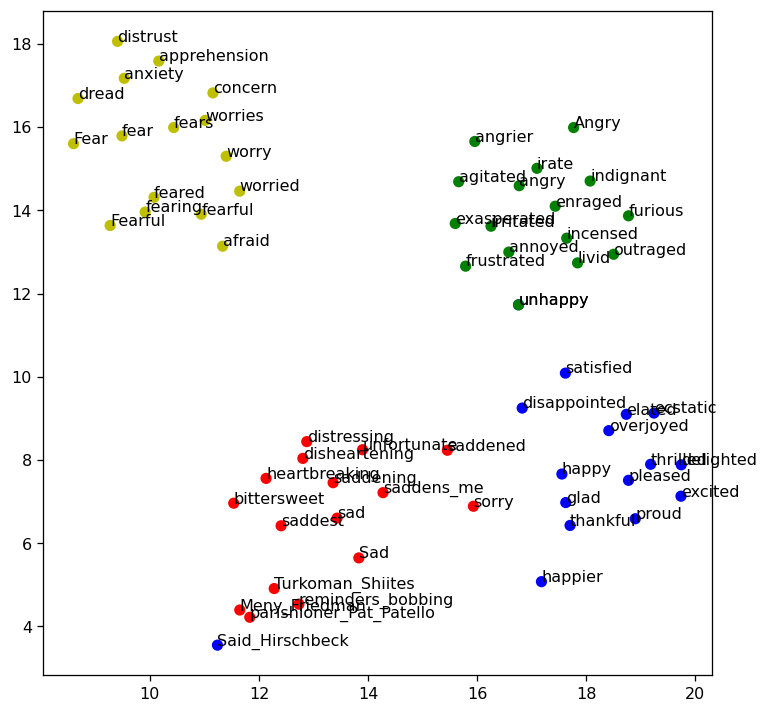

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.index_to_key)
word_train = target_words + all_word[:size]
X_train = model[word_train]

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

# Second

[Snapshot](img/pic0.png)
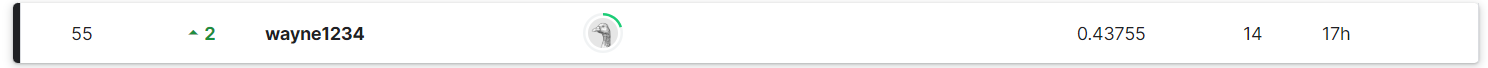

# Third

## import package

In [1]:
!pip install transformers
!pip install datasets


[notice] A new release of pip is available: 23.3 -> 23.3.2
[notice] To update, run: python39.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.3 -> 23.3.2
[notice] To update, run: python39.exe -m pip install --upgrade pip


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
import json
import pickle
import itertools
import re
import random
import os
from tqdm import tqdm, trange,tnrange,tqdm_notebook
from tqdm.notebook import tqdm
from collections import Counter

from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import mode
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import f1_score,accuracy_score, confusion_matrix, mean_squared_error, precision_score, recall_score
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import make_pipeline

import xgboost as xgb
from xgboost import XGBClassifier

import torch
from torch.nn import functional as F
from torch.optim import AdamW
from torch.utils.data import DataLoader, Dataset, TensorDataset, RandomSampler, SequentialSampler
from transformers import pipeline
from transformers import AutoModelForCausalLM, AutoTokenizer, AutoConfig, get_linear_schedule_with_warmup
from transformers import BertTokenizer, BertConfig,AdamW, BertForSequenceClassification
from transformers import AutoModelForSequenceClassification,AutoTokenizer

import keras
from keras.models import Model
from keras.layers import Input, Dense, Softmax, Activation, ReLU
from keras.callbacks import CSVLogger, EarlyStopping
from keras.utils import to_categorical

from gensim.models import KeyedVectors

import nltk


c:\Python39\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


read csv files

In [ ]:
data_identification = pd.read_csv("kaggle/data_identification.csv",names=["tweet_id", "train_or_test"])
emotion = pd.read_csv("kaggle/emotion.csv",names=["tweet_id", "emotion"])

把第一行刪掉

In [ ]:
data_identification = data_identification.drop(0, axis=0)
emotion = emotion.drop(0, axis=0)

read json

In [ ]:
path = "kaggle/tweets_DM.json"
data_list = []

with open(path, 'r') as file:
    for line in file:
        data = json.loads(line)
        data['hashtags'] = data['_source']['tweet']['hashtags']
        data['text'] = data['_source']['tweet']['text']
        data['tweet_id'] = data['_source']['tweet']['tweet_id']
        data.pop('_source')
        data_list.append(data)

In [ ]:
print(len(data_list))
print(len(emotion))
print(len(data_identification))

1867535
1455563
1867535


trun into df

In [ ]:
tweet_df = pd.DataFrame(data_list)

In [ ]:
print(tweet_df['_index'].unique())
print(tweet_df['_type'].unique())

['hashtag_tweets']
['tweets']


因為_index和_type都是一樣的，不會帶來任何資訊，所以把他們刪掉

In [ ]:
tweet_df = tweet_df.drop(['_index','_type'], axis=1)
tweet_df.head()

,_score,_crawldate,hashtags,text,tweet_id
0,391,2015-05-23 11:42:47,[Snapchat],"People who post ""add me on #Snapchat"" must be ...",0x376b20
1,433,2016-01-28 04:52:09,"[freepress, TrumpLegacy, CNN]","@brianklaas As we see, Trump is dangerous to #...",0x2d5350
2,232,2017-12-25 04:39:20,[bibleverse],"Confident of your obedience, I write to you, k...",0x28b412
3,376,2016-01-24 23:53:05,[],Now ISSA is stalking Tasha 😂😂😂 <LH>,0x1cd5b0
4,989,2016-01-08 17:18:59,[],"""Trust is not the same as faith. A friend is s...",0x2de201


In [ ]:
tweet_df = pd.merge(tweet_df, data_identification,on = "tweet_id")

In [ ]:
len(tweet_df)

1867535

把資料分割成train和test

In [ ]:
train_df = tweet_df[tweet_df['train_or_test'] == 'train']
test_df = tweet_df[tweet_df['train_or_test'] != 'train']

NameError: ignored

In [ ]:
print(len(train_df))
print(len(test_df))

1455563
411972


在train新增emotion

In [ ]:
train_df = pd.merge(train_df,emotion,on="tweet_id")
train_df.head()

,_score,_crawldate,hashtags,text,tweet_id,train_or_test,emotion
0,391,2015-05-23 11:42:47,[Snapchat],"People who post ""add me on #Snapchat"" must be ...",0x376b20,train,anticipation
1,433,2016-01-28 04:52:09,"[freepress, TrumpLegacy, CNN]","@brianklaas As we see, Trump is dangerous to #...",0x2d5350,train,sadness
2,376,2016-01-24 23:53:05,[],Now ISSA is stalking Tasha 😂😂😂 <LH>,0x1cd5b0,train,fear
3,120,2015-06-11 04:44:05,"[authentic, LaughOutLoud]",@RISKshow @TheKevinAllison Thx for the BEST TI...,0x1d755c,train,joy
4,1021,2015-08-18 02:30:07,[],Still waiting on those supplies Liscus. <LH>,0x2c91a8,train,anticipation


In [ ]:
train_df['emotion'].unique()

array(['anticipation', 'sadness', 'fear', 'joy', 'anger', 'trust',
       'disgust', 'surprise'], dtype=object)

儲存df，這樣下次才不用再process一遍

In [13]:
# with open("train_df.pkl", 'wb') as file:
#     pickle.dump(train_df, file)
# with open("test_df.pkl", 'wb') as file:
#     pickle.dump(test_df, file)

## load df

In [2]:
with open("train_df.pkl", 'rb') as file:
    train_df = pickle.load( file)
with open("test_df.pkl", 'rb') as file:
    test_df = pickle.load( file)

In [4]:
print(train_df.columns)

Index(['_score', '_crawldate', 'hashtags', 'text', 'tweet_id', 'train_or_test',
       'emotion'],
      dtype='object')


## data preprocess

### text preprocess

移除LH、@使用者、#hashtag，因為這些應該不會包含情緒的資訊

In [5]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('stopwords')
train_df['processed_text'] = [re.sub(r"<LH>", "", i)  for i in train_df['text']]
train_df['processed_text'] = [re.sub(r"@[^\s]+", "", i)  for i in train_df['processed_text']]
train_df['processed_text'] = [re.sub(r"#\w+", "", i)  for i in train_df['processed_text']]
test_df['processed_text'] = [re.sub(r"<LH>", "", i)  for i in test_df['text']]
test_df['processed_text'] = [re.sub(r"@[^\s]+", "", i)  for i in test_df['processed_text']]
test_df['processed_text'] = [re.sub(r"#\w+", "", i)  for i in test_df['processed_text']]
# def remove_stopwords(text):
#     stop_words = set(stopwords.words("english"))
#     words = word_tokenize(text)
#     filtered_words = [word for word in words if word not in stop_words]
#     return " ".join(filtered_words)
# train_df['processed_text']  = [remove_stopwords(i) for i in tqdm(train_df['processed_text'])]
# test_df['processed_text']  = [remove_stopwords(i) for i in tqdm(test_df['processed_text'])]

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [6]:
for i in range(1000,1010):
  print(train_df['processed_text'][i], train_df['emotion'][i])

Don't go into any competition with anyone. A blessed man doesn't fight for anything for inside him is a refinery of goodies  joy
Happy Thanksgiving to all you beautiful people ❤️  trust
Humility, tolerance, non-violence,  and truth are the foundations of -knowledge and real . Be blessed All joy
"Whoever is not satisfied with Christ alone, strives after something beyond absolute perfection" - John Calvin   anticipation
Omg so  of you today  totally got that  under control 😋     🙏 trust
oh shit i am  sadness
My God shall supply ALL my needs..   trust
74 The moments in your life are only once         October 16, 2017 at 01:17AM anticipation
i know right!!!    trust
 Is it bad that Jamie Foxx & and the Bachelorette chick out represent the  in  ?   disgust


### eda

In [ ]:
train_df.head()

,_score,_crawldate,hashtags,text,tweet_id,train_or_test,emotion
0,391,2015-05-23 11:42:47,[Snapchat],"People who post ""add me on #Snapchat"" must be ...",0x376b20,train,anticipation
1,433,2016-01-28 04:52:09,"[freepress, TrumpLegacy, CNN]","@brianklaas As we see, Trump is dangerous to #...",0x2d5350,train,sadness
2,376,2016-01-24 23:53:05,[],Now ISSA is stalking Tasha 😂😂😂 <LH>,0x1cd5b0,train,fear
3,120,2015-06-11 04:44:05,"[authentic, LaughOutLoud]",@RISKshow @TheKevinAllison Thx for the BEST TI...,0x1d755c,train,joy
4,1021,2015-08-18 02:30:07,[],Still waiting on those supplies Liscus. <LH>,0x2c91a8,train,anticipation


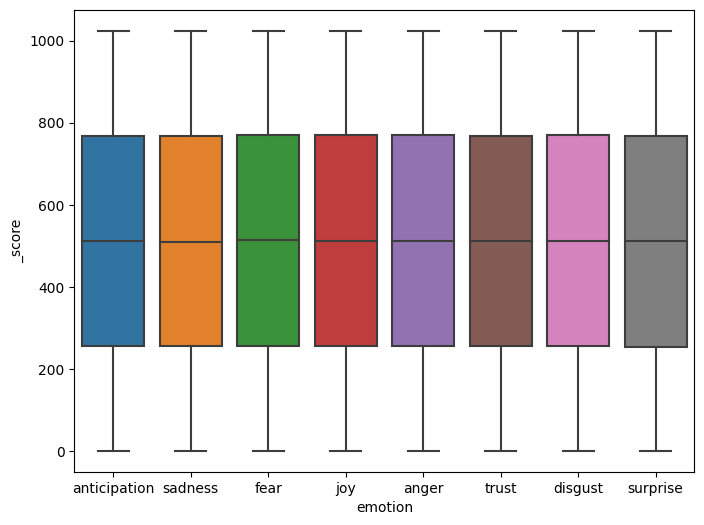

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='emotion',y='_score',data=train_df)
plt.show()

In [ ]:
train_df['hashtags_len'] = [len(i) for i in train_df['hashtags']]

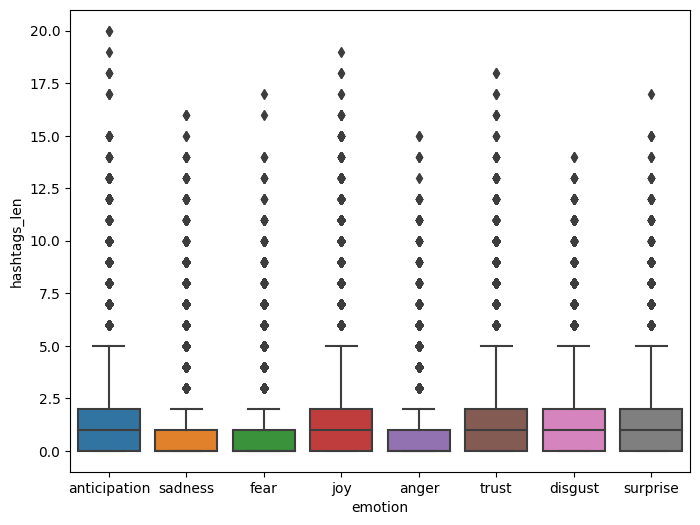

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='emotion',y='hashtags_len',data=train_df)
plt.show()

In [8]:
train_df['p_text_len'] = [len(i.split()) for i in train_df['processed_text']]
test_df['p_text_len'] = [len(i.split()) for i in test_df['processed_text']]

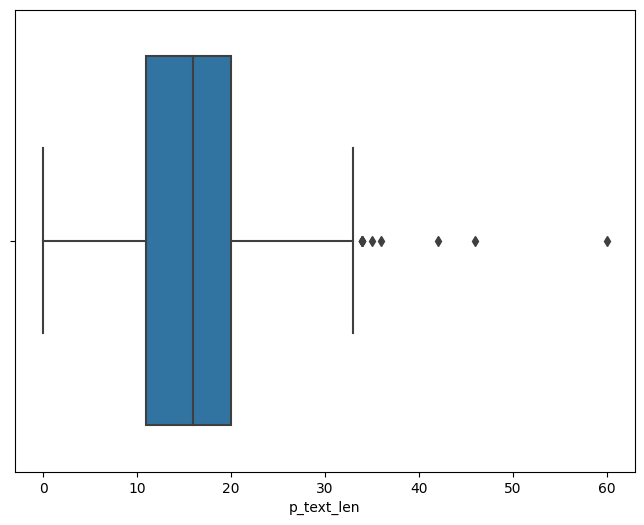

In [65]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='p_text_len',data=test_df)
plt.show()

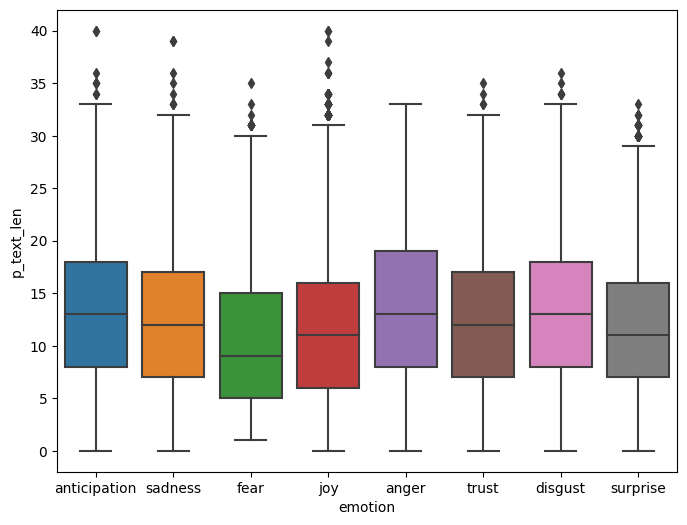

In [66]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='emotion',y='p_text_len',data=train_df)
plt.show()

句子長度大概介在0~30個字

In [47]:
print(train_df['processed_text'][train_df['p_text_len']<=3])

36          Red Sox/Patriots fans. 
52            Thanks for following 
66          Happy Thanksgiving   🦃🦃
73                      and  to    
81               Look! Over there! 
                     ...           
1455497                Only ever  😏
1455499                        life
1455506                   YOU TOO 🎶
1455521                    the few😙
1455529                completed   
Name: processed_text, Length: 105689, dtype: object


In [9]:
train_df = train_df[train_df['p_text_len']>3]

In [10]:
train_df.reset_index(inplace=True, drop=True)

In [11]:
train_df.head()

,_score,_crawldate,hashtags,text,tweet_id,train_or_test,emotion,processed_text,p_text_len
0,391,2015-05-23 11:42:47,[Snapchat],"People who post ""add me on #Snapchat"" must be ...",0x376b20,train,anticipation,"People who post ""add me on "" must be dehydrate...",13
1,433,2016-01-28 04:52:09,"[freepress, TrumpLegacy, CNN]","@brianklaas As we see, Trump is dangerous to #...",0x2d5350,train,sadness,"As we see, Trump is dangerous to around the ...",13
2,376,2016-01-24 23:53:05,[],Now ISSA is stalking Tasha 😂😂😂 <LH>,0x1cd5b0,train,fear,Now ISSA is stalking Tasha 😂😂😂,6
3,120,2015-06-11 04:44:05,"[authentic, LaughOutLoud]",@RISKshow @TheKevinAllison Thx for the BEST TI...,0x1d755c,train,joy,Thx for the BEST TIME tonight. What stories!...,10
4,1021,2015-08-18 02:30:07,[],Still waiting on those supplies Liscus. <LH>,0x2c91a8,train,anticipation,Still waiting on those supplies Liscus.,6


## output answer file

用來輸出submission

In [12]:
def output_file(id,emotion, name):
  temp_df = pd.DataFrame({'id':id, 'emotion':emotion})
  temp_df.to_csv(name+".csv",index = False)

## BOW 500

In [ ]:

# # build analyzers (bag-of-words)
# BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize)

# # apply analyzer to training data
# BOW_500.fit(train_df['text'])

CountVectorizer(max_features=500,
                tokenizer=<function word_tokenize at 0x7a7372972ef0>)

load

In [ ]:
# for a classificaiton problem, you need to provide both training & testing data
# X_train = BOW_500.transform(train_df['text'])

# X_test = BOW_500.transform(test_df['text'])


In [ ]:
y_train = train_df['emotion']


### Decision Tree Classifier

In [ ]:

## build DecisionTree model
DT_model = DecisionTreeClassifier(random_state=1)

## training!
DT_model = DT_model.fit(X_train, y_train)

## predict!
y_train_pred = DT_model.predict(X_train)
y_test_pred = DT_model.predict(X_test)

output_file(test_df['tweet_id'],y_test_pred,"desicion_tree")

In [ ]:
# Funciton for visualizing confusion_matrix

def plot_confusion_matrix(cm, classes, title='Confusion matrix',
                          cmap=sns.cubehelix_palette(as_cmap=True)):
    """
    This function is modified from:
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    classes.sort()
    tick_marks = np.arange(len(classes))

    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels = classes,
           yticklabels = classes,
           title = title,
           xlabel = 'Predicted label',
           ylabel = 'True label')

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -.5])
    plt.tight_layout()

    plt.show()

[[16761     4     4   177     7     3     4     0]
 [   23 13084    12   200     5     0    22     0]
 [   23     3  4208    99     5     2    17     0]
 [   88    14    54 35426    12    22    53     0]
 [    1     0     2    23  2682     0     1     0]
 [   42    11    13   261     3 13704    16     2]
 [   33    10     6   121     4     2  9357     0]
 [   13     4     2    57     2     2     3  3291]]


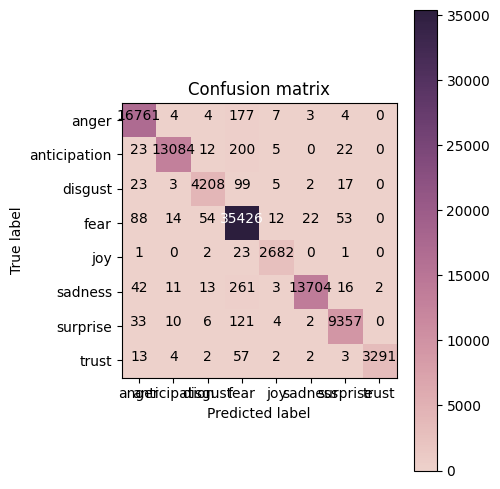

training accuracy: 0.99


In [ ]:

cm = confusion_matrix(y_true=y_train, y_pred=y_train_pred, labels=['anticipation', 'sadness', 'fear', 'joy',
            'anger', 'trust','disgust', 'surprise'])
print(cm)
# plot your confusion matrix
my_tags = ['anticipation', 'sadness', 'fear', 'joy', 'anger', 'trust','disgust', 'surprise']
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')
acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
print('training accuracy: {}'.format(round(acc_train, 2)))

### naive bayes

In [ ]:

nb = MultinomialNB()
nb.fit(X_train, y_train)

nb_y_train_pred = nb.predict(X_train)
nb_y_test_pred = nb.predict(X_test)
output_file(test_df['tweet_id'],nb_y_test_pred,"NB")

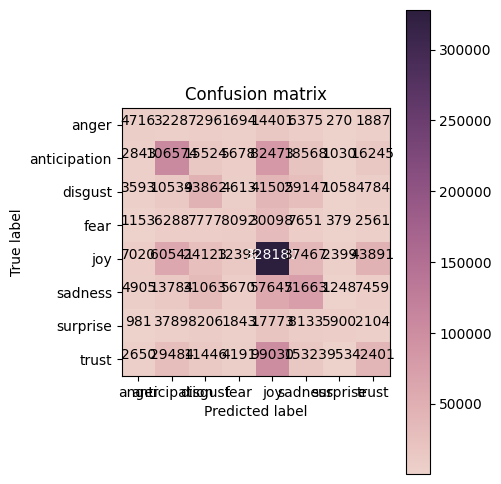

training accuracy: 0.42


In [ ]:
acc_train = accuracy_score(y_true=y_train, y_pred=nb_y_train_pred)
my_tags = ['anticipation', 'sadness', 'fear', 'joy', 'anger', 'trust','disgust', 'surprise']
cm = confusion_matrix(y_true=y_train, y_pred=nb_y_train_pred)
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')
acc_train = accuracy_score(y_true=y_train, y_pred=nb_y_train_pred)
print('training accuracy: {}'.format(round(acc_train, 2)))

### NN

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

In [ ]:
print(len(y_train), len(y_val))

1091664 363888


In [ ]:


label_encoder = LabelEncoder()
label_encoder.fit(y_train)
print('check label: ', label_encoder.classes_)
print('\n## Before convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)

def label_encode(le, labels):
    enc = le.transform(labels)
    return keras.utils.to_categorical(enc)

def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1)
    return le.inverse_transform(dec)

y_train = label_encode(label_encoder, y_train)
y_val = label_encode(label_encoder, y_val)

print('\n\n## After convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('\ny_val.shape: ', y_val.shape)

check label:  ['anger' 'anticipation' 'disgust' 'fear' 'joy' 'sadness' 'surprise'
 'trust']

## Before convert
y_train[0:4]:
 1061095    sadness
924912         joy
1248105        joy
325872         joy
Name: emotion, dtype: object

y_train.shape:  (1091664,)


## After convert
y_train[0:4]:
 [[0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]]

y_train.shape:  (1091664, 8)

y_val.shape:  (363888, 8)


In [ ]:
input_shape = X_train.shape[1]
print('input_shape: ', input_shape)

output_shape = len(label_encoder.classes_)
print('output_shape: ', output_shape)


# input layer
model_input = Input(shape=(input_shape, ))  # 500
X = model_input

# 1st hidden layer
X_W1 = Dense(units=64)(X)  # 64
H1 = ReLU()(X_W1)

# 2nd hidden layer
H1_W2 = Dense(units=64)(H1)  # 64
H2 = ReLU()(H1_W2)

# output layer
H2_W3 = Dense(units=output_shape)(H2)  # 4
H3 = Softmax()(H2_W3)

model_output = H3

# create model
model = Model(inputs=[model_input], outputs=[model_output])

# loss function & optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# show model construction
model.summary()

input_shape:  500
output_shape:  8
Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 500)]             0         
                                                                 
 dense_3 (Dense)             (None, 64)                32064     
                                                                 
 re_lu_2 (ReLU)              (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 re_lu_3 (ReLU)              (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 8)                 520       
                                                                 
 softmax_1 (Softmax)    

In [ ]:
csv_logger = CSVLogger('/content/drive/MyDrive/Colab Notebooks/Lab2/model/logs/training_log.csv')
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
# training setting
epochs = 25
batch_size = 32 #113*32 = data size

# training!
history = model.fit(X_train, y_train,
                    epochs=epochs,
                    batch_size=batch_size,
                    callbacks=[csv_logger,early_stopping],
                    validation_data = (X_val, y_val))
print('training finish')

Epoch 1/25
34115/34115 [==============================] - 242s 7ms/step - loss: 1.4196 - accuracy: 0.4829 - val_loss: 1.3916 - val_accuracy: 0.4910
Epoch 2/25
34115/34115 [==============================] - 235s 7ms/step - loss: 1.3774 - accuracy: 0.4973 - val_loss: 1.3802 - val_accuracy: 0.4966
Epoch 3/25
34115/34115 [==============================] - 228s 7ms/step - loss: 1.3660 - accuracy: 0.5015 - val_loss: 1.3805 - val_accuracy: 0.4951
Epoch 4/25
34115/34115 [==============================] - 234s 7ms/step - loss: 1.3597 - accuracy: 0.5038 - val_loss: 1.3761 - val_accuracy: 0.4981
Epoch 5/25
34115/34115 [==============================] - 229s 7ms/step - loss: 1.3552 - accuracy: 0.5058 - val_loss: 1.3732 - val_accuracy: 0.5000
Epoch 6/25
34115/34115 [==============================] - 227s 7ms/step - loss: 1.3518 - accuracy: 0.5071 - val_loss: 1.3761 - val_accuracy: 0.4979
Epoch 7/25
34115/34115 [==============================] - 228s 7ms/step - loss: 1.3496 - accuracy: 0.5077 - val_

In [ ]:
pred_result = model.predict(X_test, batch_size=128)
pred_result = label_decode(label_encoder, pred_result)
output_file(test_df['tweet_id'],pred_result,"NN_BOW500")

3219/3219 [==============================] - 9s 3ms/step


## TF IDF

In [71]:
vect_tf = TfidfVectorizer(ngram_range=(1,1),stop_words='english',max_features=3500)
X_vec_tf = vect_tf.fit_transform(train_df['processed_text'])
X_test_vec_tf = vect_tf.transform(test_df['processed_text'])
# path = '/content/drive/MyDrive/Colab Notebooks/Lab2/model/'
# with open(path+"train_tfidf3500.pkl", 'wb') as file:
#     pickle.dump(X_vec_tf, file)
# with open(path+"test_tfidf3500.pkl", 'wb') as file:
#     pickle.dump(X_test_vec_tf, file)

In [72]:
X_train = X_vec_tf
X_test = X_test_vec_tf

In [ ]:
with open("train_tfidf3500.pkl", 'rb') as file:
    X_train = pickle.load(file)
with open("test_tfidf3500.pkl", 'rb') as file:
    X_test = pickle.load(file)

In [ ]:
train_df['emotion'].unique()

array(['anticipation', 'sadness', 'fear', 'joy', 'anger', 'trust',
       'disgust', 'surprise'], dtype=object)

計算每個情緒的tfidf總和

In [74]:
emotions = train_df['emotion'].unique()
emotion_tfidf = np.zeros((len(emotions),X_train.shape[1]))
length = np.diff(X_train.indptr)
for i in range(len(emotions)):
  for j in trange(len(train_df)):
    if emotions[i] == train_df['emotion'][j]:
      emotion_tfidf[i] += X_train[j]

100%|██████████| 1349874/1349874 [00:19<00:00, 68357.44it/s]


In [ ]:
# path = '/content/drive/MyDrive/Colab Notebooks/Lab2/model/'
# with open(path+"emotion_tfidf.pkl", 'wb') as file:
#     pickle.dump(emotion_tfidf, file)

In [14]:
with open("emotion_tfidf.pkl", 'rb') as file:
    emotion_tfidf = pickle.load(file)

In [15]:
Counter(train_df['emotion'])

Counter({'anticipation': 248935,
         'sadness': 193437,
         'fear': 63999,
         'joy': 516017,
         'anger': 39867,
         'trust': 205478,
         'disgust': 139101,
         'surprise': 48729})

In [76]:
for i in range(len(emotions)):
  print(emotions[i])
  print(np.max(emotion_tfidf[i]), np.mean(emotion_tfidf[i]), np.sum(emotion_tfidf[i]))

anticipation
5599.45233453824 136.62802517183843 478198.08810143446
sadness
4835.850925688804 100.5866301876791 352053.20565687685
fear
1667.61504347624 30.782019661480398 107737.0688151814
joy
13671.544116946763 263.6026574218289 922609.3009764011
anger
764.126635001724 22.932709432050594 80264.48301217708
trust
4324.114366713852 107.98948589860701 377963.20064512454
disgust
2820.733287742264 74.52630269617386 260842.0594366085
surprise
916.2125633833118 24.523657723720863 85832.80203302302


In [77]:
emo_count = Counter(train_df['emotion'])
for i in range(len(emotions)):
  print(emotions[i])
  print("before",np.max(emotion_tfidf[i]), np.mean(emotion_tfidf[i]), np.sum(emotion_tfidf[i]))
  emotion_tfidf[i] = emotion_tfidf[i]/np.linalg.norm(emotion_tfidf[i])
  print("after",np.max(emotion_tfidf[i]), np.mean(emotion_tfidf[i]), np.sum(emotion_tfidf[i]))

anticipation
before 5599.45233453824 136.62802517183843 478198.08810143446
after 0.2896854743711677 0.007068397393111081 24.739390875888784
sadness
before 4835.850925688804 100.5866301876791 352053.20565687685
after 0.3723836940290575 0.007745652522133408 27.109783827466927
fear
before 1667.61504347624 30.782019661480398 107737.0688151814
after 0.34660239698600703 0.0063978325456330145 22.39241390971555
joy
before 13671.544116946763 263.6026574218289 922609.3009764011
after 0.34232506660561945 0.006600410055180985 23.101435193133447
anger
before 764.126635001724 22.932709432050594 80264.48301217708
after 0.2542106004304818 0.007629282329893136 26.702488154625975
trust
before 4324.114366713852 107.98948589860701 377963.20064512454
after 0.28265395100321855 0.007058937915937764 24.706282705782176
disgust
before 2820.733287742264 74.52630269617386 260842.0594366085
after 0.32293530828717 0.008532240407584013 29.862841426544048
surprise
before 916.2125633833118 24.523657723720863 85832.802

看每個情緒的最多字眼

In [24]:
print(emotions)

['anticipation' 'sadness' 'fear' 'joy' 'anger' 'trust' 'disgust'
 'surprise']


In [23]:
for i in emotion_tfidf:
  sorted_indices = np.argsort(i)
  top_10_indices = sorted_indices[-10:]
  names = vect_tf.get_feature_names_out()
  for j in top_10_indices:
    print(names[j], end = ' ')
  print()

today come day just wait time love thank life god 
really hey people day know hi don like just play 
episode tonight watching like love just time molly issa lawrence 
god life happy birthday today good just thank day love 
right today day like don people just billions thousands millions 
life god good follow thanks happy today love day thank 
going right know did shame really don people like just 
dies love know people watchmojo don like just killed calls 


### cosine similarity

In [78]:
similarity = cosine_similarity(X_train, emotion_tfidf)
pred = emotions[np.argmax(similarity, axis =1)]

In [79]:
accuracy_score(pred,train_df['emotion'])

0.291653887696185

### xgb

In [ ]:
y_train = train_df['emotion']
reg_model = XGBClassifier(n_estimators=100, learning_rate= 0.3)
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
reg_model.fit(X_train, y_train)
y_pred = reg_model.predict(X_test)
y_pred = label_encoder.inverse_transform(y_pred.astype(int))
output_file(test_df['tweet_id'],y_pred,"tfidf xgboost")

In [ ]:
reg_model.score(X_train,y_train)

0.5181136096479506

### NN

In [ ]:
y_train = train_df['emotion']
length = len(y_train)
y_train = y_train[:length//32*32]
X_train = X_train[:length//32*32]
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
X_train = X_train.toarray()
X_val = X_val.toarray()

NameError: ignored

In [ ]:
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
def label_encode(le, labels):
    enc = le.transform(labels)
    return keras.utils.to_categorical(enc)

def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1)
    return le.inverse_transform(dec)

y_train = label_encode(label_encoder, y_train)
y_val = label_encode(label_encoder, y_val)

In [ ]:
input_shape = X_train.shape[1]
print('input_shape: ', input_shape)

output_shape = len(label_encoder.classes_)
print('output_shape: ', output_shape)


# input layer
model_input = Input(shape=(input_shape, ))  # 500
X = model_input

# 1st hidden layer
X_W1 = Dense(units=800)(X)  # 64
H1 = Activation('sigmoid')(X_W1)

# 2nd hidden layer
H1_W2 = Dense(units=800)(H1)  # 64
H2 = Activation('sigmoid')(H1_W2)

# output layer
H2_W3 = Dense(units=output_shape)(H2)  # 4
H3 = Softmax()(H2_W3)

model_output = H3

# create model
model = Model(inputs=[model_input], outputs=[model_output])

# loss function & optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# show model construction
model.summary()

input_shape:  3500
output_shape:  8
Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 3500)]            0         
                                                                 
 dense_3 (Dense)             (None, 800)               2800800   
                                                                 
 activation_2 (Activation)   (None, 800)               0         
                                                                 
 dense_4 (Dense)             (None, 800)               640800    
                                                                 
 activation_3 (Activation)   (None, 800)               0         
                                                                 
 dense_5 (Dense)             (None, 8)                 6408      
                                                                 
 softmax_1 (Softmax)   

In [ ]:
csv_logger = CSVLogger('logs/training_log.csv')
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
# training setting
epochs = 25
batch_size = 16

# training!
history = model.fit(X_train, y_train,
                    epochs=epochs,
                    batch_size=batch_size,
                    callbacks=[csv_logger,early_stopping],
                    validation_data = (X_val, y_val))
print('training finish')

InvalidArgumentError: ignored

## word2vec

In [16]:
model_path = "GoogleNews/GoogleNews-vectors-negative300.bin.gz"
w2v_google_model = KeyedVectors.load_word2vec_format(model_path, binary=True)
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [19]:
train_df.loc[:,'text_tokenized'] = train_df['processed_text'].apply(lambda x: nltk.word_tokenize(x))
test_df.loc[:,'text_tokenized']  = test_df['processed_text'].apply(lambda x: nltk.word_tokenize(x))

KeyboardInterrupt: 

In [18]:
w2v_google_train = []
for i in train_df.index:
    v = np.zeros(300)
    for w in train_df['text_tokenized'][i]:
        if w2v_google_model.has_index_for(w):
            v += w2v_google_model.get_vector(w)
    v /= len(train_df['text_tokenized'][i])
    w2v_google_train.append(v)


In [19]:
w2v_google_train = np.array(w2v_google_train)

print(w2v_google_train.shape)
with open("w2v_google_train.pkl", 'wb') as file:
    pickle.dump(w2v_google_train, file)

(1349874, 300)


In [21]:
w2v_google_test = []
for i in test_df.index:
    v = np.zeros(300)
    for w in test_df['text_tokenized'][i]:
        if w2v_google_model.has_index_for(w):
            v += w2v_google_model.get_vector(w)
    v /= len(test_df['text_tokenized'][i])
    w2v_google_test.append(v)


C:\Users\user\AppData\Local\Temp\ipykernel_17428\2005852118.py:7: RuntimeWarning: invalid value encountered in divide
  v /= len(test_df['text_tokenized'][i])


In [23]:
w2v_google_test = np.array(w2v_google_test)
print(w2v_google_test.shape)
with open("w2v_google_test.pkl", 'wb') as file:
    pickle.dump(w2v_google_test, file)

del w2v_google_model

(411972, 300)


### load w2v

In [4]:
with open("w2v_google_train.pkl", 'rb') as file:
    X_train = pickle.load(file)
with open("w2v_google_test.pkl", 'rb') as file:
    X_test = pickle.load(file)

In [5]:
y_train = list(train_df['emotion'])

### xgboost

In [10]:
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=42)

In [11]:
len(X_train),len(X_val)

(944911, 404963)

In [12]:
learning_rates = [0.01, 0.1, 0.2, 0.3]
n_estimators_v = [300,500,700]
max_depths = [3,5,7]

best_accuracy = 0
best_params = {}

for lr in learning_rates:
    for md in max_depths:
      for ne in n_estimators_v:
        st = time.time()
        model = xgb.XGBClassifier(
            learning_rate=lr,
            max_depth=md,
            n_estimators=ne,
            tree_method = "hist", device = "cuda"
        )
        model.fit(X_train, y_train)
        y_pred = model.predict(X_val)
        accuracy = accuracy_score(y_val, y_pred)
        et = time.time()
        print("accuracy:",accuracy, "learning_rate:",lr,'max_depth:',md,'n_estimators:',ne,'time:',et-st)
        if accuracy > best_accuracy:

          best_accuracy = accuracy
          best_params = {'learning_rate': lr, 'max_depth': md,'n_estimators': ne}


KeyboardInterrupt: 

In [ ]:
print(best_params)

In [ ]:
model = xgb.XGBClassifier(
            learning_rate=best_params['learning_rate'],
            max_depth=best_params['max_depth'],
            n_estimators=best_params['n_estimators'],
            tree_method = "hist", device = "cuda"
        )
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred = label_encoder.inverse_transform(y_pred.astype(int))
output_file(test_df['tweet_id'],y_pred,"w2v xgboost")

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [09:29:27] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  warnings.warn(smsg, UserWarning)


NameError: ignored

### NN

In [6]:
y_train = train_df['emotion']
print(len(y_train),X_train.shape)
length = len(y_train)
# y_train = y_train[:length//32*32]
# X_train = X_train[:length//32*32]
print(len(y_train),X_train.shape)

1349874 (1349874, 300)
1349874 (1349874, 300)


In [7]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=42)

In [8]:


label_encoder = LabelEncoder()
label_encoder.fit(y_train)
print('check label: ', label_encoder.classes_)
print('\n## Before convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)

def label_encode(le, labels):
    enc = le.transform(labels)
    return keras.utils.to_categorical(enc)

def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1)
    return le.inverse_transform(dec)

y_train = label_encode(label_encoder, y_train)
y_val = label_encode(label_encoder, y_val)

print('\n\n## After convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('\ny_val.shape: ', y_val.shape)

check label:  ['anger' 'anticipation' 'disgust' 'fear' 'joy' 'sadness' 'surprise'
 'trust']

## Before convert
y_train[0:4]:
 1257544    anticipation
1307894             joy
176580         surprise
326642            anger
Name: emotion, dtype: object

y_train.shape:  (1012405,)


## After convert
y_train[0:4]:
 [[0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]]

y_train.shape:  (1012405, 8)

y_val.shape:  (337469, 8)


In [9]:
input_shape = X_train.shape[1]
print('input_shape: ', input_shape)

output_shape = len(label_encoder.classes_)
print('output_shape: ', output_shape)


# input layer
model_input = Input(shape=(input_shape, ))  # 500
X = model_input

# 1st hidden layer
X_W1 = Dense(units=64)(X)  # 64
H1 = Activation('sigmoid')(X_W1)

# 2nd hidden layer
H1_W2 = Dense(units=64)(H1)  # 64
H2 = Activation('sigmoid')(H1_W2)

# output layer
H2_W3 = Dense(units=output_shape)(H2)  # 4
H3 = Softmax()(H2_W3)

model_output = H3

# create model
model = Model(inputs=[model_input], outputs=[model_output])

# loss function & optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# show model construction
model.summary()

input_shape:  300
output_shape:  8
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 300)]             0         
                                                                 
 dense (Dense)               (None, 64)                19264     
                                                                 
 activation (Activation)     (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 activation_1 (Activation)   (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 8)                 520       
                                                                 
 softmax (Softmax)        

In [14]:
csv_logger = CSVLogger('logs/training_log.csv')
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
# training setting
epochs = 25
batch_size = 16

# training!
history = model.fit(X_train, y_train,
                    epochs=epochs,
                    batch_size=batch_size,
                    callbacks=[csv_logger,early_stopping],
                    validation_data = (X_val, y_val))
print('training finish')

Epoch 1/25
63276/63276 [==============================] - 156s 2ms/step - loss: 1.4344 - accuracy: 0.4701 - val_loss: 1.4408 - val_accuracy: 0.4679
Epoch 2/25
63276/63276 [==============================] - 156s 2ms/step - loss: 1.4276 - accuracy: 0.4728 - val_loss: 1.4371 - val_accuracy: 0.4685
Epoch 3/25
63276/63276 [==============================] - 157s 2ms/step - loss: 1.4224 - accuracy: 0.4750 - val_loss: 1.4328 - val_accuracy: 0.4704
Epoch 4/25
63276/63276 [==============================] - 160s 3ms/step - loss: 1.4177 - accuracy: 0.4768 - val_loss: 1.4302 - val_accuracy: 0.4715
Epoch 5/25
63276/63276 [==============================] - 159s 3ms/step - loss: 1.4139 - accuracy: 0.4785 - val_loss: 1.4256 - val_accuracy: 0.4739
Epoch 6/25
63276/63276 [==============================] - 159s 3ms/step - loss: 1.4103 - accuracy: 0.4795 - val_loss: 1.4234 - val_accuracy: 0.4739
Epoch 7/25
 9832/63276 [===>..........................] - ETA: 1:51 - loss: 1.4059 - accuracy: 0.4818

KeyboardInterrupt: 

In [15]:
pred_result = model.predict(X_test)
pred_result = label_decode(label_encoder, pred_result)
output_file(test_df['tweet_id'],pred_result,"NN_w2v")

12875/12875 [==============================] - 20s 2ms/step


## fine tune llm

In [ ]:
## create label and sentence list
sentences = train_df[400000:550000].text.values
labels = train_df[400000:550000].emotion.values
# print("Distribution of data based on labels: ",train_df[:4000].emotion.value_counts())
MAX_LEN = 256

path_model = '/content/drive/MyDrive/Colab Notebooks/Lab2/model/fine_tune'
path_tokenizer = '/content/drive/MyDrive/Colab Notebooks/Lab2/model/tokenizer'
conti_train = True

if conti_train:
  tokenizer = AutoTokenizer.from_pretrained(path_tokenizer)
else:
  tokenizer = BertTokenizer.from_pretrained('bert-base-uncased',do_lower_case=True)
input_ids = [tokenizer.encode(sent, add_special_tokens=True,max_length=MAX_LEN,pad_to_max_length=True) for sent in sentences]
## Create attention mask
attention_masks = []
## Create a mask of 1 for all input tokens and 0 for all padding tokens
attention_masks = [[float(i>0) for i in seq] for seq in input_ids]

print("Actual sentence before tokenization: ",sentences[2])
print("Encoded Input from dataset: ",input_ids[2])
print(attention_masks[2])



Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2614: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


Actual sentence before tokenization:  Silvia, my mother, hates me.  <LH>
Encoded Input from dataset:  [101, 27827, 1010, 2026, 2388, 1010, 16424, 2033, 1012, 1026, 1048, 2232, 1028, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0

In [ ]:
X_train,X_val,y_train,y_val = train_test_split(input_ids,labels,random_state=41,test_size=0.1)
train_masks,validation_masks,_,_ = train_test_split(attention_masks,input_ids,random_state=41,test_size=0.1)

In [ ]:
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_val = label_encoder.fit_transform(y_val)

In [ ]:
del input_ids
del sentences
del labels
del attention_masks
del train_df
import gc
gc.collect()

0

In [ ]:
# convert all our data into torch tensors, required data type for our model
X_train = torch.tensor(X_train)
X_val = torch.tensor(X_val)
y_train = torch.tensor(y_train)
y_val = torch.tensor(y_val)
train_masks = torch.tensor(train_masks)
validation_masks = torch.tensor(validation_masks)

batch_size = 16

# Create an iterator of our data with torch DataLoader.
# This helps save on memory during training because, unlike a for loop,
# with an iterator the entire dataset does not need to be loaded into memory
train_data = TensorDataset(X_train,train_masks,y_train)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data,sampler=train_sampler,batch_size=batch_size)

validation_data = TensorDataset(X_val,validation_masks,y_val)
validation_sampler = RandomSampler(validation_data)
validation_dataloader = DataLoader(validation_data,sampler=validation_sampler,batch_size=batch_size)

In [ ]:
train_data[0]

(tensor([  101,  3532,  7987,  2072,  2006,  2023,  3058,  1012,  1026,  1048,
          2232,  1028,  1001,  2917, 26547,   102,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,  

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
n_gpu = torch.cuda.device_count()
print(device)

cuda


In [ ]:
if conti_train:
  model = AutoModelForSequenceClassification.from_pretrained(path_model, return_dict=True)
else:
  model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=8).to(device)

# Parameters:
lr = 2e-5
adam_epsilon = 1e-8

epochs = 1

num_warmup_steps = 0
num_training_steps = len(train_dataloader)*epochs

optimizer = AdamW(model.parameters(), lr=lr,eps=adam_epsilon,correct_bias=False)
scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=num_warmup_steps, num_training_steps=num_training_steps)

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [ ]:
## Store our loss and accuracy for plotting
train_loss_set = []
learning_rate = []
model.to(device)
# Gradients gets accumulated by default
model.zero_grad()

# tnrange is a tqdm wrapper around the normal python range
for _ in tnrange(1,epochs+1,desc='Epoch'):
  print("<" + "="*22 + F" Epoch {_} "+ "="*22 + ">")
  # Calculate total loss for this epoch
  batch_loss = 0
  for step, batch in enumerate(tqdm(train_dataloader)):
    # Set our model to training mode (as opposed to evaluation mode)
    model.train()

    # Add batch to GPU
    batch = tuple(t.to(device) for t in batch)
    # Unpack the inputs from our dataloader
    b_input_ids, b_input_mask, b_labels = batch

    # Forward pass
    outputs = model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask, labels=b_labels)
    loss = outputs[0]

    # Backward pass
    loss.backward()

    # Clip the norm of the gradients to 1.0
    # Gradient clipping is not in AdamW anymore
    torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

    # Update parameters and take a step using the computed gradient
    optimizer.step()

    # Update learning rate schedule
    scheduler.step()

    # Clear the previous accumulated gradients
    optimizer.zero_grad()

    # Update tracking variables
    batch_loss += loss.item()

  # Calculate the average loss over the training data.
  avg_train_loss = batch_loss / len(train_dataloader)

  #store the current learning rate
  for param_group in optimizer.param_groups:
    print("\n\tCurrent Learning rate: ",param_group['lr'])
    learning_rate.append(param_group['lr'])

  train_loss_set.append(avg_train_loss)
  print(F'\n\tAverage Training loss: {avg_train_loss}')

  # Validation

  # Put model in evaluation mode to evaluate loss on the validation set
  model.eval()

  # Tracking variables
  eval_accuracy,eval_mcc_accuracy,nb_eval_steps = 0, 0, 0

  # Evaluate data for one epoch
  for batch in validation_dataloader:
    # Add batch to GPU
    batch = tuple(t.to(device) for t in batch)
    # Unpack the inputs from our dataloader
    b_input_ids, b_input_mask, b_labels = batch
    # Telling the model not to compute or store gradients, saving memory and speeding up validation
    with torch.no_grad():
      # Forward pass, calculate logit predictions
      logits = model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask)

    # Move logits and labels to CPU
    logits = logits[0].to('cpu').numpy()
    label_ids = b_labels.to('cpu').numpy()

    pred_flat = np.argmax(logits, axis=1).flatten()
    labels_flat = label_ids.flatten()

    df_metrics=pd.DataFrame({'Epoch':epochs,'Actual_class':labels_flat,'Predicted_class':pred_flat})

    tmp_eval_accuracy = accuracy_score(labels_flat,pred_flat)
    tmp_eval_mcc_accuracy = matthews_corrcoef(labels_flat, pred_flat)

    eval_accuracy += tmp_eval_accuracy
    eval_mcc_accuracy += tmp_eval_mcc_accuracy
    nb_eval_steps += 1

  print(F'\n\tValidation Accuracy: {eval_accuracy/nb_eval_steps}')
  print(F'\n\tValidation MCC Accuracy: {eval_mcc_accuracy/nb_eval_steps}')
  model.save_pretrained(path_model)
  tokenizer.save_pretrained(path_tokenizer)

<ipython-input-13-9e41e1db8467>:9: TqdmDeprecationWarning: Please use `tqdm.notebook.trange` instead of `tqdm.tnrange`
  for _ in tnrange(1,epochs+1,desc='Epoch'):


Epoch:   0%|          | 0/1 [00:00<?, ?it/s]

<====================== Epoch 1 ======================>


  0%|          | 0/8438 [00:00<?, ?it/s]


	Current Learning rate:  0.0

	Average Training loss: 1.537855274320129

	Validation Accuracy: 0.46628464818763327

	Validation MCC Accuracy: 0.29059824358078357


## Third 總結

preprocess中，將LH、@使用者、#hashtag清除，  
使用了3種faeture: BOW、TFIDF、word2vec  
BOW用了Decision Tree、naive bayes、NN，但結果都沒有很好  
TFIDF使用了consine similarity、xgboost、NN，效果比BOW好，但沒有word2vec好  
word2vec使用了xgboost、NN，其中最好的是NN  
有另外嘗試fine tune bert但因為硬體設備不足沒有成功  